Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
import itertools
import statsmodels.api as sm
import seaborn as sns

Importing the Dataset

In [3]:
data=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [5]:
data.head()

Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87

In [4]:
data.to_csv ("crude_oil_price_daily.csv", index = None, header=True)

In [6]:
df=pd.read_csv('crude_oil_price_daily.csv')

In [7]:
df.head()

Date  Closing Value
0  1986-01-02          25.56
1  1986-01-03          26.00
2  1986-01-06          26.53
3  1986-01-07          25.85
4  1986-01-08          25.87

Handling Missing Data

In [8]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [9]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [10]:
data.dropna(axis=0,inplace=True)

In [11]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

Feature Scaling

In [12]:
oil_price=data.reset_index()['Closing Value']
oil_price

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
oil_price=scaler.fit_transform(np.array(oil_price).reshape(-1,1))

Data Visualisation

Text(0.5, 1.0, 'Price Trend over years')

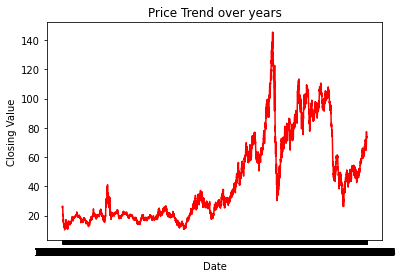

In [14]:
g = sns.lineplot(x='Date',y='Closing Value',data = df,color="red")
plt.title("Price Trend over years")

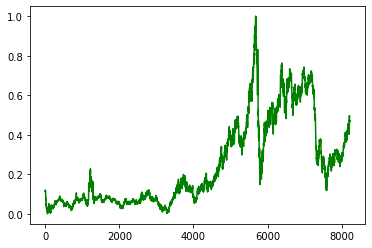

In [15]:
plt.plot(oil_price,color="green")

In [16]:
def price_plot_from_date_range(df, start_date, end_date):
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Closing Value',data = sdf)
    plt.title("Price Trend over years")

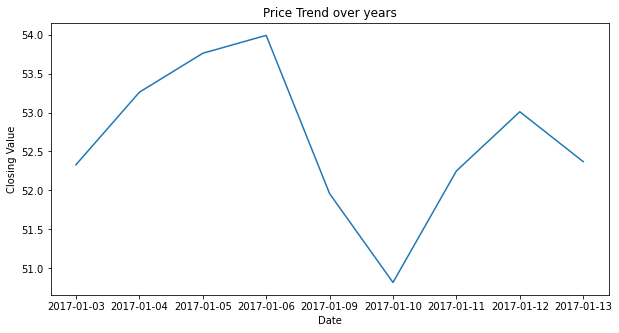

In [17]:
price_plot_from_date_range(df,'2017-01-01','2017-01-15')

Splitting Dataset into Train and Test

In [18]:
training_size=int(len(oil_price)*0.65)
test_size=len(oil_price)-training_size
train_data,test_data=oil_price[0:training_size,:],oil_price[training_size:len(oil_price),:1]

In [19]:
print("Training Data Size: ",training_size)
print("Test Data Size: ",test_size)

Training Data Size:  5340
Test Data Size:  2876


In [20]:
train_data.shape


(5340, 1)

In [21]:
test_data.shape

(2876, 1)

Creating Dataset With Sliding Windows

In [22]:
def Dataset_Creation(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [23]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [24]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [25]:
y_train.shape

(5329,)

In [26]:
print(x_test.shape)
print(y_test.shape)

(2865, 10)
(2865,)


In [27]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [28]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# **Model Building**

In [29]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [30]:
model=Sequential()

Adding LSTM Layers

In [31]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

Adding Output Layers

In [32]:
model.add(Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='mean_squared_error',optimizer='adam')

Training

In [35]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
84/84 [==============================] - 11s 44ms/step - loss: 0.0024 - val_loss: 9.7783e-04
Epoch 2/30
84/84 [==============================] - 2s 26ms/step - loss: 1.2720e-04 - val_loss: 7.6177e-04
Epoch 3/30
84/84 [==============================] - 2s 26ms/step - loss: 1.2270e-04 - val_loss: 8.0203e-04
Epoch 4/30
84/84 [==============================] - 2s 24ms/step - loss: 1.2704e-04 - val_loss: 7.8667e-04
Epoch 5/30
84/84 [==============================] - 2s 25ms/step - loss: 1.2124e-04 - val_loss: 0.0011
Epoch 6/30
84/84 [==============================] - 2s 26ms/step - loss: 1.2186e-04 - val_loss: 7.4732e-04
Epoch 7/30
84/84 [==============================] - 2s 27ms/step - loss: 1.3431e-04 - val_loss: 9.0029e-04
Epoch 8/30
84/84 [==============================] - 2s 27ms/step - loss: 1.1730e-04 - val_loss: 7.6446e-04
Epoch 9/30
84/84 [==============================] - 2s 25ms/step - loss: 1.1374e-04 - val_loss: 6.9864e-04
Epoch 10/30
84/84 [=========================

Model Evaluation

In [36]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)

In [37]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

Save The Model

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save("crude_oil_price_prediction.h5")

Test the Model

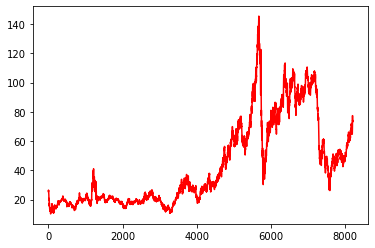

In [40]:
look_back=10
trainpredictPlot = np.empty_like(oil_price)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictplot = np.empty_like(oil_price)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict

plt.plot(scaler.inverse_transform(oil_price),color="red")
plt.show()

In [41]:
len(test_data)

2876

In [42]:
x_input=test_data[2866:2876].reshape(1,-1)
x_input.shape

(1, 10)

In [43]:
print(x_input)

[[0.4417296  0.4811195  0.49726048 0.46794017 0.47297497 0.47119799
  0.47341922 0.46497853 0.47038353 0.47149415]]


In [44]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [47]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
       x_input=np.array(temp_input[1:11]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) 
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] 
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

0 day input [0.46606466 0.46496019 0.46383551 0.46256658 0.46089408 0.45931813
 0.4577311  0.45617294 0.45454103 0.45299208]
0 day output [[0.45145553]]
1 day input [0.46496019 0.46383551 0.46256658 0.46089408 0.45931813 0.4577311
 0.45617294 0.45454103 0.45299208 0.45145553]
1 day output [[0.44987667]]
2 day input [0.46383551 0.46256658 0.46089408 0.45931813 0.4577311  0.45617294
 0.45454103 0.45299208 0.45145553 0.44987667]
2 day output [[0.44831657]]
3 day input [0.46256658 0.46089408 0.45931813 0.4577311  0.45617294 0.45454103
 0.45299208 0.45145553 0.44987667 0.44831657]
3 day output [[0.44676888]]
4 day input [0.46089408 0.45931813 0.4577311  0.45617294 0.45454103 0.45299208
 0.45145553 0.44987667 0.44831657 0.44676888]
4 day output [[0.4452304]]
5 day input [0.45931813 0.4577311  0.45617294 0.45454103 0.45299208 0.45145553
 0.44987667 0.44831657 0.44676888 0.44523039]
5 day output [[0.4436971]]
6 day input [0.4577311  0.45617294 0.45454103 0.45299208 0.45145553 0.44987667
 0.448